<a href="https://colab.research.google.com/github/EricHidekiMiyahara/clusterizacaoClientesKmeans/blob/main/ClusterizacaoClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo básico e final sobre a quantidade de clusters ideal (k) com uma base de dados pequena:

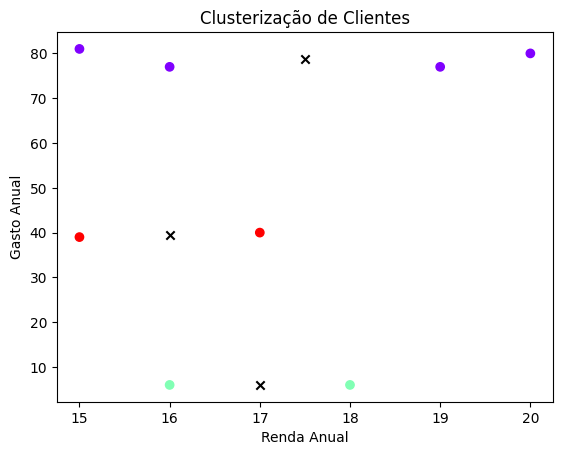

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Exemplo de dados de clientes
X = np.array([[15, 39], [15, 81], [16, 6], [16, 77], [17, 40], [18, 6], [19, 77], [20, 80]])

# Inicializando o algoritmo com 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Obtendo os centróides e os rótulos dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizando os clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black')
plt.xlabel('Renda Anual')
plt.ylabel('Gasto Anual')
plt.title('Clusterização de Clientes')
plt.show()

2º exemplo com uma base de dados maior.

Veja como cada dado se classifica ou associa, de acordo com a distância entre ele próprio e todos os clusters:

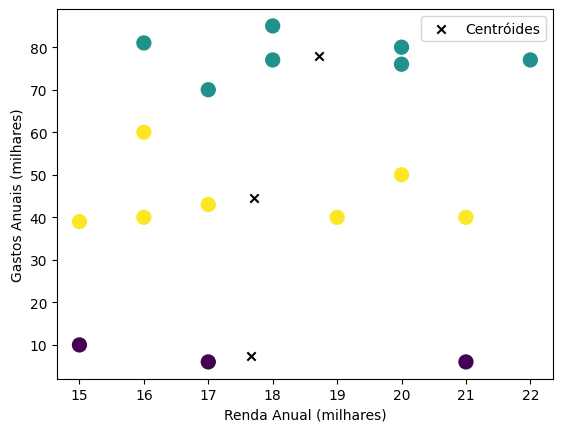

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios de clientes
X = np.array([[15, 39], [16, 81], [17, 6], [18, 77], [19, 40], [20, 76], [21, 6], [22, 77], [16, 40], [17,43], [20, 50], [21,40], [15, 10], [16, 60] , [17, 70], [18, 85], [20, 80]])

# Inicializando o modelo com K=3
kmeans = KMeans(n_clusters=3, init='random', random_state=42)

# Ajuste do modelo aos dados
kmeans.fit(X)

# Previsão dos clusters
y_kmeans = kmeans.predict(X)

# Visualização dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', label='Centróides')
plt.xlabel('Renda Anual (milhares)')
plt.ylabel('Gastos Anuais (milhares)')
plt.legend()
plt.show()

3º exemplo: Quantidade de clusters ideal a partir do método do Cotovelo.

Nesse código você pode definir a quantidade máxima de testes para aquele valor de clusters, nesse caso, usei 10 vezes.

Observe pelo gráfico do método do Cotovelo, que o momento em que ele faz uma mudança brusca ou o tempo em que o gráfico literalmente vira um formato de cotovelo, é o valor ideal de clusters, que, nesse exemplo são 3.

Por fim, agora baste que você rode esse parte do código para as visualizações do que foi mencionado. Você pode usar o atalho "control" + "enter" do seu teclado para rodar, ou apenas clicar na bolinha branca que vai aparecer quando você colocar o mouse por cima, no canto superior esquerdo e no [22].

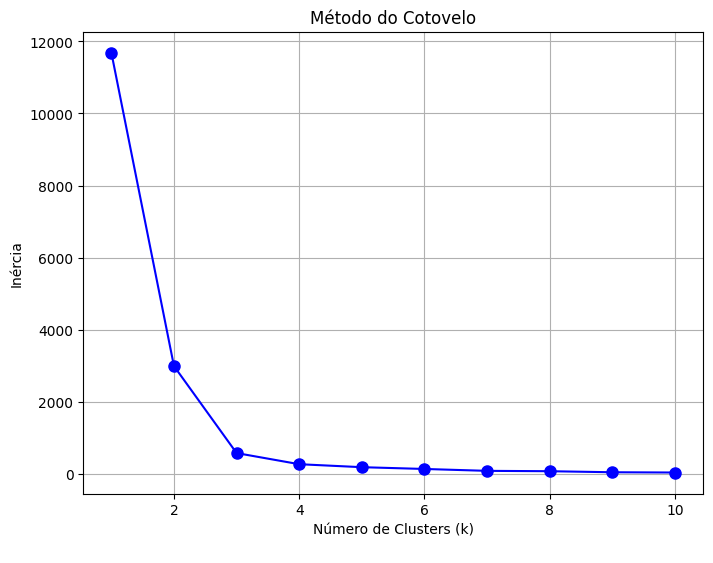

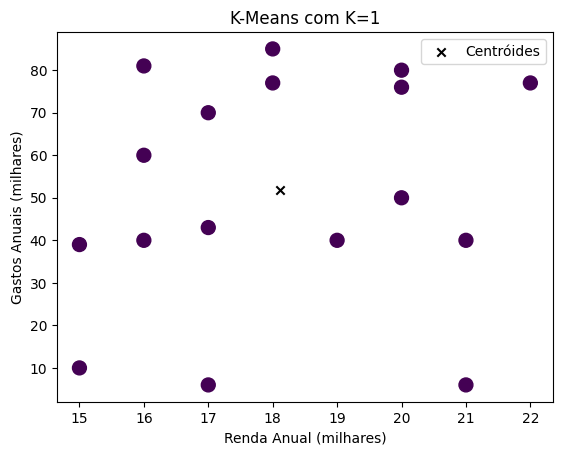

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Função para carregar o valor de K a partir do arquivo, ou iniciar em 1 se não existir
def carregar_k():
    if os.path.exists('k_value.txt'):
        with open('k_value.txt', 'r') as file:
            k = int(file.read().strip())
    else:
        k = 1  # Se não houver arquivo, começar com K=1
    return k

# Função para salvar o valor de K no arquivo
def salvar_k(k):
    with open('k_value.txt', 'w') as file:
        file.write(str(k))

# Carregar o valor atual de K
k_atual = carregar_k()

# Dados fictícios de clientes
X = np.array([[15, 39], [16, 81], [17, 6], [18, 77], [19, 40], [20, 76], [21, 6], [22, 77], [16, 40], [17, 43],
              [20, 50], [21, 40], [15, 10], [16, 60], [17, 70], [18, 85], [20, 80]])

# Encontrar a quantidade ideal de clusters com o método do Cotovelo
inertia = []
K_range = range(1, 11)  # Testando de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Armazenando a inércia para cada k

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)\n')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

# Limite superior de K (defina o máximo que deseja testar, por exemplo, 10)
limite_k = 10

# Inicializando o modelo com o valor atual de K
kmeans = KMeans(n_clusters=k_atual, init='random', random_state=42)

# Ajuste do modelo aos dados
kmeans.fit(X)

# Previsão dos clusters
y_kmeans = kmeans.predict(X)

# Visualização dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', label='Centróides')
plt.xlabel('Renda Anual (milhares)')
plt.ylabel('Gastos Anuais (milhares)')
plt.legend()
plt.title(f'K-Means com K={k_atual}')
plt.show()

# Incrementar o valor de K para a próxima execução
if k_atual < limite_k:
    k_atual += 1
else:
    k_atual = 1  # Reiniciar o valor de K quando atingir o limite

# Salvar o novo valor de K para a próxima execução
salvar_k(k_atual)